# Conical Spirals

The idea is to construct a spiral (Archimedean spiral or others) around a right-cone simulating a Christmas tree. We want to be able to model the situation and understand how many lights or how long the strip(s) should be to wrap the proper amount of loops around the tree. This notebook will establish the basic model and mathematics.

## References

- https://en.wikipedia.org/wiki/Cone
- https://en.wikipedia.org/wiki/Conical_spiral
- https://en.wikipedia.org/wiki/Archimedean_spiral
- http://www.mathematische-basteleien.de/spiral.htm
- http://jwilson.coe.uga.edu/EMT668/EMT668.Folders.F97/Anderson/writeup11/writeup11.html
- http://www.intmath.com/blog/mathematics/length-of-an-archimedean-spiral-6595
- http://www.intmath.com/applications-integration/12-arc-length-curve-parametric-polar.php
- http://tutorial.math.lamar.edu/Classes/CalcIII/VectorArcLength.aspx

# Markdown Parser in Jupyter

<div class="alert alert-block alert-info"> <b>NOTE</b> Use blue boxes for Tips and notes. </div>

<div class="alert alert-block alert-success"> Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe you decide to use green boxes for related links from each section of a notebook. </div>

<div class="alert alert-block alert-warning"> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. </div>

<div class="alert alert-block alert-danger"> In general, just avoid the red boxes. </div>

# Notebook Preamble

In [1]:
%%javascript
//Disable autoscroll in the output cells - needs to be in a separate cell with nothing else
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# decide whether charts will be displayed interactively or in a format that exports to pdf

# Interactive -----------------
# For interactive notebook uncomment:
%matplotlib notebook

# PDF -----------------
# For pdf plotting uncomment:
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

%config InlineBackend.figure_formats = ['png', 'pdf'] #['svg']

#------------
# Setup matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D # handle 3D plots
import matplotlib as mpl

# uncomment the following if you have more then 40 plots
# mpl.rcParams['figure.max_open_warning'] = 60

mpl.rc('font',family='monospace') # all font on the plot will be monospace

In [3]:
import numpy as np

from plots import create_standard_figure, axis_legend_remove_duplicates
from common import plot_cone, plot_spiral, plot_center_pole,plot_cone_and_sprial

## LED Design

We want to construct a set of methods and equations that can describe an LED strip arranged in a sprial around a right-circular cone with base radius $r$ and height, $h$.

<figure>    
    <img src="../images/right-cone.svg" alt="right-cone" style="width:100%">
    <figcaption align = "left">
        <b>Figure 1:</b> Right-Cone
    </figcaption>
</figure>

<figure>    
    <img src="../images/spirals-top.svg" alt="right-cone - top view" style="width:100%">
    <figcaption align = "left">
        <b>Figure 2:</b> Right-Cone - Top View
    </figcaption>
</figure>

<figure>    
    <img src="../images/spirals.svg" alt="right-cone - sprials" style="width:100%">
    <figcaption align = "left">
        <b>Figure 3:</b> Sprials around the cone.
    </figcaption>
</figure>


# Archimedian Spiral

The [Archimedean spiral](https://en.wikipedia.org/wiki/Archimedean_spiral) is the simpliest of the sprials. It is defined, in polar coordinates, by:

$$ 
\begin{equation} \tag{1}
r(\theta) = b \theta + p 
\end{equation}
$$

Where:

- $r(\theta)$ - The distance to a point on the curve defined by $\theta$
- $\theta$ - An angle.
- $b$ - A constant, defines the distance between successive intersection points between the curve and the axis.
- $p$ - A constant, the initial radius of the curve, the starting point.

<div class="alert alert-block alert-info"> <b>NOTE:</b> The archimedean spiral is also arithmetic spiral.</div>

<div class="alert alert-block alert-info"> <b>NOTE:</b> The distance between two successive turns is $d = 2 \pi b$. In other words, the distances of intersection points along a line through the origin and the spiral are the same.</div>


<div class="alert alert-block alert-warning"> For this article we are going to assume $p = 0$. </div>

## Parameteric Form


The general parametric equations are:

$$
\begin{matrix}
x(\theta) = r \sin \theta \\ 
y(\theta) = r \cos \theta
\end{matrix}
$$


Convert, the polar equation (1) to parameteric form:

$$
\begin{matrix}
x(\theta) = b \theta \sin \theta \\ 
y(\theta) = b \theta \cos \theta
\end{matrix}
$$


<IPython.core.display.Javascript object>


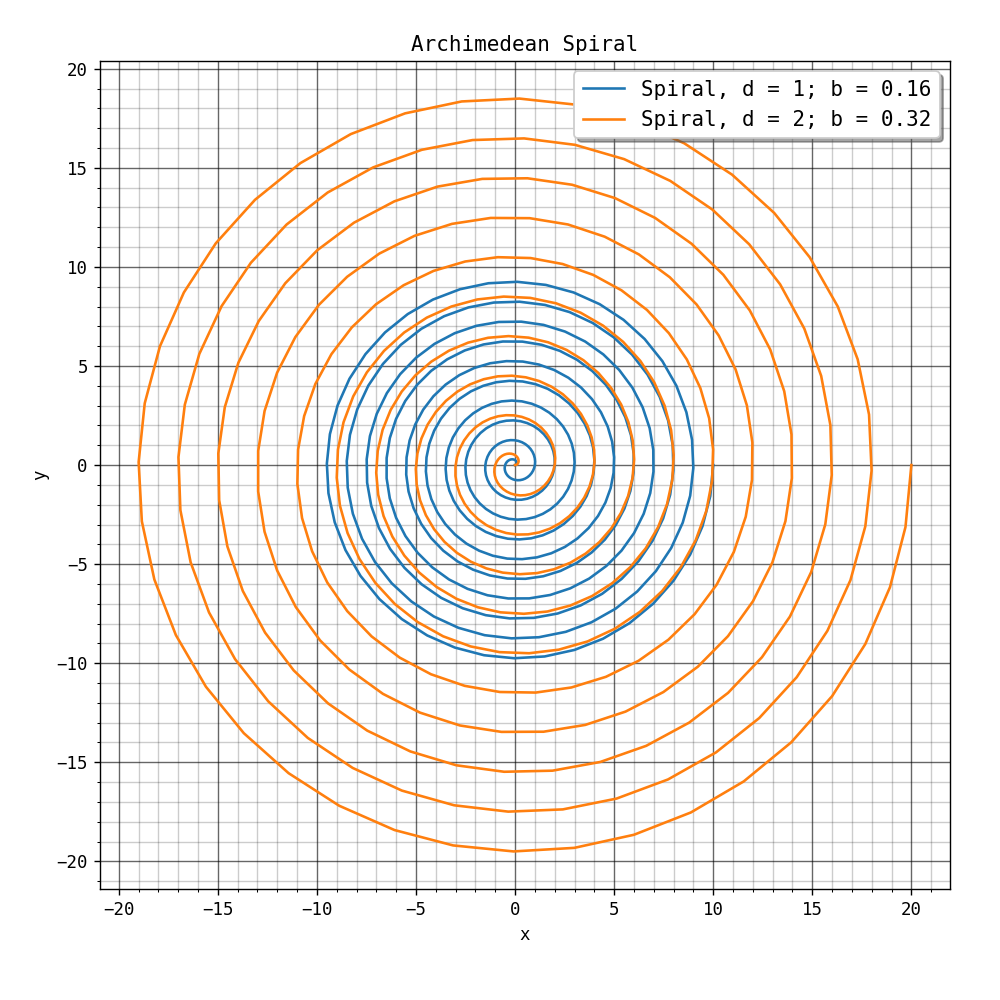

In [4]:
fig, ax = create_standard_figure('Archimedean Spiral',
                                 'x',
                                 'y',                                                 
                                 figsize=(8, 8),                                                  
                                 axes_rect=(0.1, 0.1, 0.85, 0.85)) # rect [left, bottom, width, height]

theta = np.linspace(0.0, 20*np.pi, 400)

for d in [1, 2]:        
    
    b = d/(2*np.pi)
    
    x = b*theta*np.cos(theta)
    y = b*theta*np.sin(theta)
    
    ax.plot(x, y, '-', label='Spiral, d = {}; b = {:.2f}'.format(d, b))

ax.legend(
    loc='best', 
    shadow=True, 
    fancybox=True,
    prop={'family': 'monospace', 'size':12},
    frameon=True,
)

# make sure the aspect ratio of the plot is equal
ax.set_aspect('equal') 

fig.show() 

## 3D

We can extend the parametric system to three dimensions:

$$
\begin{equation} \tag{2}
\begin{matrix}
x(\theta) = b \theta \sin \theta \\ 
y(\theta) = b \theta \cos \theta \\ 
z(\theta) = z_0 + m \theta
\end{matrix}
\end{equation}
$$

Where:

- $z_0$ - The inital starting position of the spiral
- $m$ - The slope of the cone with respect to the `XY` plane

<div class="alert alert-block alert-info"> <b>NOTE:</b> We'll assume that $ \theta \ge 0$ </div>

<IPython.core.display.Javascript object>


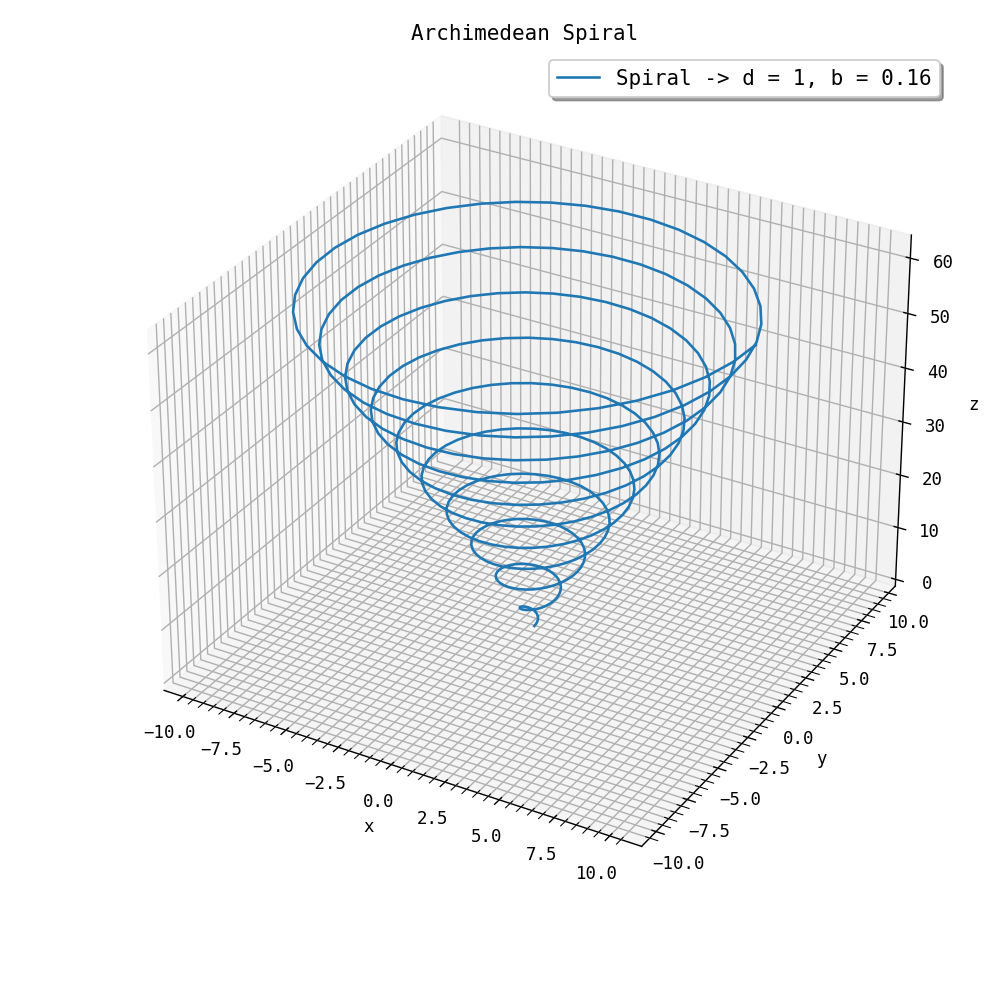

In [5]:
fig, ax = create_standard_figure(
    'Archimedean Spiral',
    'x',
    'y',
    'z',    
    projection='3d',
    figsize=(8, 8),                                                  
    axes_rect=(0.1, 0.1, 0.85, 0.85)) # rect [left, bottom, width, height]


theta = np.linspace(0.0, 20*np.pi, 400)
m = 1
z0 = 0

for d in [1]:        
    
    b = d/(2*np.pi)
    
    x = b*theta*np.cos(theta)
    y = b*theta*np.sin(theta)    
    
    z = m*theta + z0
    
    ax.plot(x, y, z, '-', label='Spiral -> d = {}, b = {:.2f}'.format(d, b))

ax.legend(loc='best', 
          shadow=True, 
          fancybox=True,
          prop={'family': 'monospace', 'size':12},
          frameon=True)



fig.show() 

## Re-Worked Model

I want the spiral to look like a tree. Given positive angles the spiral opens upwards and looks like an inverted tree. What I want is for the spiral to open downwards starting from the top of the cone to the base. It should also end with the radius that matches the radius of the cone itself. Let's re-work the model.

We will use the same set of equations as defined in  (2). We will use negative angles and starting from $z_0 = h$ to achieve the effect:

$$ \theta \le 0$$

We also want to stop the spiral when:

$$ b \theta \le r$$


If we know $b$ and $r$, we can solve for the stop angle, $\theta$:

$$
\begin{equation} \tag{3}
\theta = \frac{r}{b}
\end{equation}
$$

We also need to solve for $m$ to determine the proper slope of the cone so the spiral fits within our constaints.

$$ 
\begin{split}
z(\theta) & = z_0 + m \theta     \\
z(\theta) & = z_0 + m \frac{r}{b} \\
z(\theta) - z_0 & = m \frac{r}{b}
\end{split}
$$|

$$
\begin{equation} \tag{4}
m = \frac{b}{r} \left( z(\theta) - z_0 \right)
\end{equation}
$$

In our case, $z(\theta) = 0$ and  $z_0 = h$j, simplifying (4) to: 

$$
\begin{equation} \tag{5}
\therefore m =-h\frac{b}{r}
\end{equation}
$$

<IPython.core.display.Javascript object>


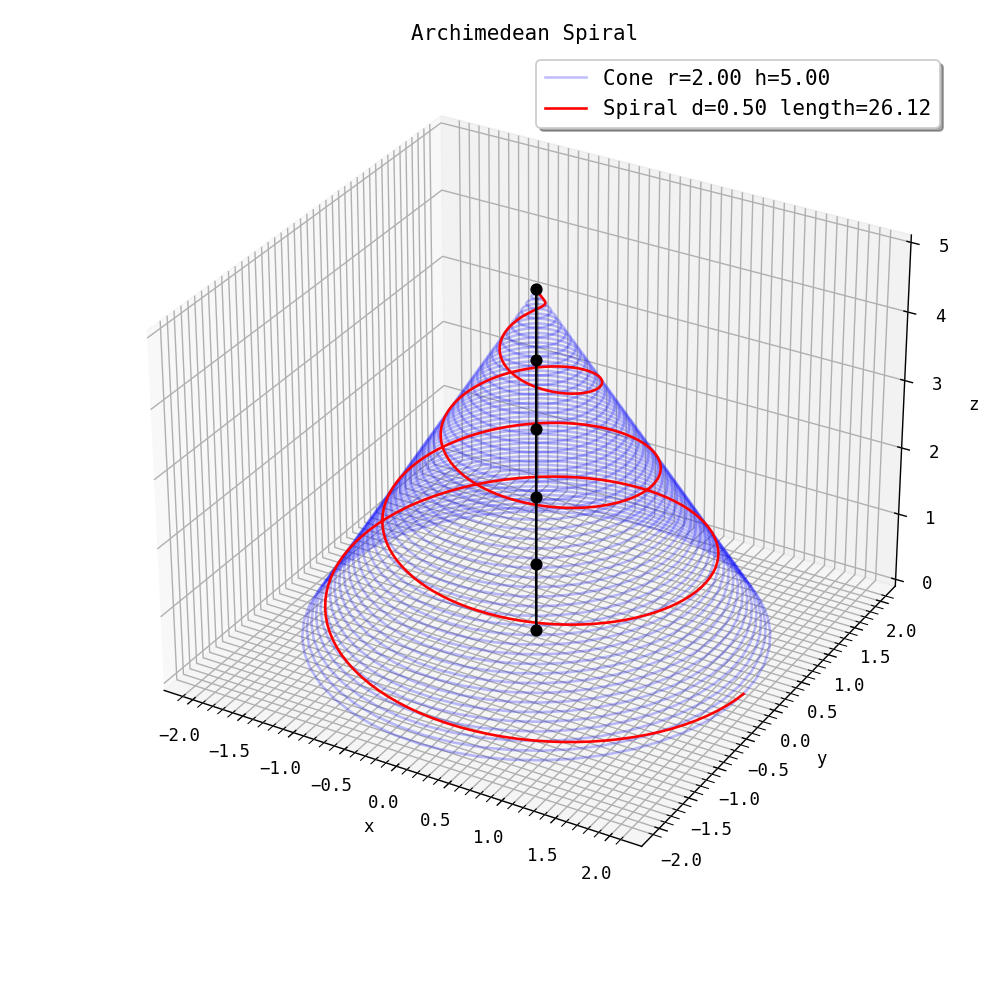

Cone Radius (r) = 2.0000
Cone Height (h) = 5.0000
Sprial Distance (d) = 0.5000


In [6]:
fig, ax = create_standard_figure(
    'Archimedean Spiral',
    'x',
    'y',
    'z',
    projection='3d',
    figsize=(8, 8),                                                  
    axes_rect=(0.1, 0.1, 0.85, 0.85), # rect [left, bottom, width, height]
) 

# NOTE: Units are in what every system you want as long as all length units are the same (ft, m, inches, mm)

# Cone
r = 2 # m
h = 5 # m
d = 0.5 # m

# d is the spacing between successive loops projected to the XY plane. 
# You can play with it to adjust the vertical spacing (XZ plane).

plot_cone_and_sprial(ax, r, h, d)

# ax.view_init(elev=0, azim=45)

fig.show() 